<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
# let's rename our columns to make them more intuitive - Credit: Tutorial 2
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math for 8th grade>**

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [5]:
# We want to grab all the unique values from the "YEAR" column in our dataframe and sort them
years = df.YEAR.unique()
years.sort()

# Output
print("Years in dataset:")
print(years)

print("Number of years:")
print(len(years))

Years in dataset:
[1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2019]
Number of years:
33


Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [6]:
# Helper function for printing a rounded value
def rounded(data):
    return str(round(data, 3))

# Set up dataframe with multi-index
hdf = df.set_index(['STATE', 'YEAR'])
hdf.sort_index(inplace = True)

# Calculate means
ohio_mean = hdf.loc['OHIO', 'AVG_MATH_8_SCORE'].mean()
mich_mean = hdf.loc['MICHIGAN', 'AVG_MATH_8_SCORE'].mean()

# Output
print("Average 8th grade math score in Ohio across all years: "  + rounded(ohio_mean))
print("Average 8th grade math score in Michigan across all years: " + rounded(mich_mean))

Average 8th grade math score in Ohio across all years: 282.25
Average 8th grade math score in Michigan across all years: 276.167


Find the average for your pedictor score across all states in 2019

In [7]:
# Calculate mean for score data from 2019
df_19 = df[df['YEAR'] == 2019]
mean_19 = df_19.loc[:, 'AVG_MATH_8_SCORE'].mean()

# Output
print("Average math score across all states in 2019: " + rounded(mean_19))

Average math score across all states in 2019: 281.264


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [8]:
# Group by state and use max to find the top score
df.groupby('STATE').max()['AVG_MATH_8_SCORE'].sort_values(ascending = False)

STATE
MASSACHUSETTS           301.0
NEW_JERSEY              296.0
NEW_HAMPSHIRE           296.0
VERMONT                 295.0
MINNESOTA               295.0
NORTH_DAKOTA            293.0
DODEA                   293.0
MONTANA                 293.0
COLORADO                292.0
SOUTH_DAKOTA            291.0
TEXAS                   290.0
WASHINGTON              290.0
VIRGINIA                290.0
KANSAS                  290.0
PENNSYLVANIA            290.0
OHIO                    290.0
WYOMING                 289.0
CONNECTICUT             289.0
WISCONSIN               289.0
MAINE                   289.0
MARYLAND                288.0
NEBRASKA                288.0
INDIANA                 288.0
UTAH                    287.0
IDAHO                   287.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
NATIONAL                285.0
ILLINOIS                285.0
OREGON                  285.0
DELAWARE                284.0
RHODE_ISLAND            284.0
ALAS

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [9]:
# Instructional expenditure by student
df.dropna(subset = ['ENROLL_ALL'], inplace = True)
df.dropna(subset = ['INSTRUCTION_EXPENDITURE'], inplace = True)
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

# Score data for 4th/8th Grade Math and 8th Grade Reading
df.dropna(subset = ['AVG_MATH_8_SCORE'], inplace = True)
df.dropna(subset = ['AVG_MATH_4_SCORE'], inplace = True)
df.dropna(subset = ['AVG_READING_8_SCORE'], inplace = True)

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,3.852618
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,5.700798
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,2.777389
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,3.891361
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,4.609008


Final feature list: **Instructional Expenditure Per Student, Average 4th Grade Math Score, Average 8th Grade Reading Score**

Feature selection justification: 

Instructional expenditure per student was selected because I believe that educational funding will have an impact on student performance.

Average 4th grade math score was selected because I believe that performance in past math tests will be a strong predictor of performance on future math tests.

Similarly, I believe that there will be a significant correlation between tests taken in the same grade, so I have selected the average 8th grade reading score as my last feature. 

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Educational Investment vs Outcomes for US states, 2015')

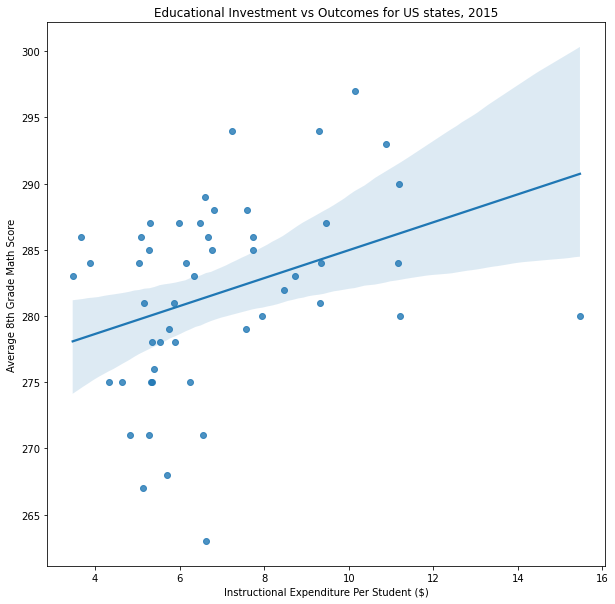

In [10]:
# For this visualization I will make a basic scatterplot w/ trend line 
# showing the relatonship between investment in instruction and educational outcome for all US states in 2015 

# Create scatterplot
plt.figure(figsize=(10, 10))
sns.regplot(data = df[df['YEAR'] == 2015], x = 'INSTRUCTION_EXPENDITURE_PER_STUDENT', y = 'AVG_MATH_8_SCORE')

# Label
plt.xlabel('Instructional Expenditure Per Student ($)')
plt.ylabel('Average 8th Grade Math Score')
plt.title('Educational Investment vs Outcomes for US states, 2015')

This chart displays the relationship between average 8th grade math test scores and instructional expenditure per student, for US states in 2015. What the trend line suggests is that there exists a moderate correlation between educational investment per student and student performance in 8th grade math tests.

At the very right of the chart we see a noticable outlier:

In [11]:
# Find state that spent the most on instruction per student in 2015
df[df['YEAR'] == 2015].set_index(['STATE'])['INSTRUCTION_EXPENDITURE_PER_STUDENT'].idxmax()

'NEW_YORK'

Despite spending more than the rest of country on its students, New York's investments have not translated into better educational outcomes. This suggests that in some cases more funding does not lead to better results.

**Visualization 2**

Text(0.5, 1.0, 'Average Math Test Scores for 4th vs 8th Grade for US states, 2015')

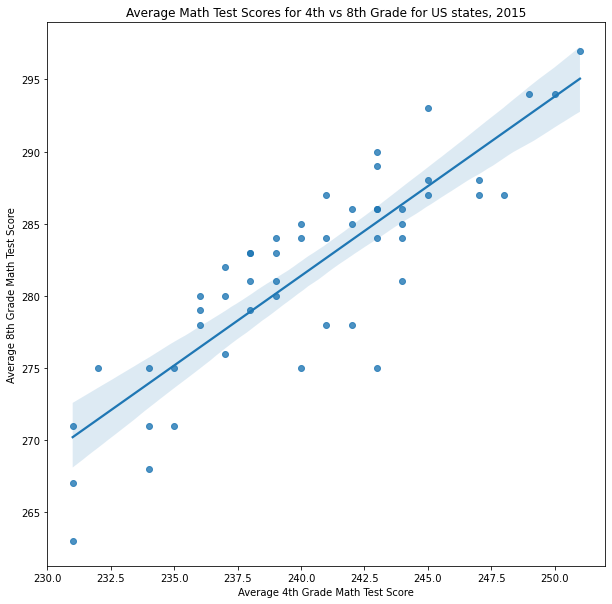

In [12]:
# For this visualization I am interested in seeing the relationship between 
# average math test scores in 4th Grade and average math test scores in 8th Grade
plt.figure(figsize=(10, 10))
sns.regplot(data = df[df['YEAR'] == 2015], x = 'AVG_MATH_4_SCORE', y = 'AVG_MATH_8_SCORE')

# Label
plt.xlabel('Average 4th Grade Math Test Score')
plt.ylabel('Average 8th Grade Math Test Score')
plt.title('Average Math Test Scores for 4th vs 8th Grade for US states, 2015')

This chart displays the relationship between average math test scores for US 4th and 8th graders in 2015. As we can see from the trend line and overall linearity of the points, there appears to exist a strong correlation between the scores.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# For my model I am interested in predicting if a state's average 8th grade math test score
# will be above or below the US average across all years (around 281)

X = df[['AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE', 'INSTRUCTION_EXPENDITURE_PER_STUDENT']]
y = df.loc[X.index]['AVG_MATH_8_SCORE'] > df['AVG_MATH_8_SCORE'].mean()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size = 0.3, random_state = 0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **CLASSIFICATION**

In [16]:
# import your sklearn class here
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# create your model here
model = KNeighborsClassifier(n_neighbors = 3)

In [18]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = model.predict(X_test)

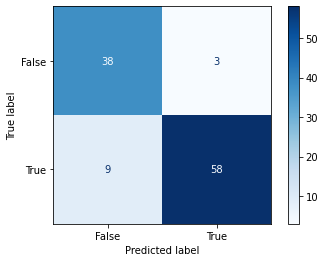

In [20]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [21]:
# Get performance metrics for ML model
from sklearn.metrics import accuracy_score, recall_score, precision_score

# accuracy score
print('Accuracy: ' + rounded(accuracy_score(y_test, model.predict(X_test))))

# recall / sensitivity
print('Recall: ' + rounded(recall_score(y_test, model.predict(X_test))))

# precision / specificity
print('Precision: ' + rounded(precision_score(y_test, model.predict(X_test))))

Accuracy: 0.889
Recall: 0.866
Precision: 0.951


In [22]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.

'''
col_name = ''
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

#new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math Score')
'''

;

''

<h2> Summary </h2>

**Data Visualization**

My data visualization showed that there was a correlation between instructional funding and average math test score for 8th grade, as I had expected, but the strength of the association appeared to be moderate. I found an interesting outlier in the state of New York, which far outspent other states in education per student but had only achieved a middle-of-the-road test score average in 8th grade math. I also found a very strong relationship between 4th and 8th grade math test score averages. This indicates to me that if we want to predict a test score average, previous test score averages would be very good features to include.

**Prediction**

Using three features from my dataset, I produced a model that is able to classify if a state's average 8th grade math test score in a particular year will beat the US average across all years. My result achieved around 89% accuracy on my test data, indicating that it is a good starting point but more optimization could be done. 

**Recommendation**

My results have shown that student performance can be predicted with good accuracy, mostly by using performance in past or contemporary tests (4th grade math / 8th grade reading scores) as features. Non-test related features such as instructional spending per student can also increase prediction accuracy, but to a limited degree.

**Follow-Up**

If I were to continue working with this dataset, I would be most interested in exploring cases such as New York, in which instructional spending per student is high yet educational outcomes are average, and searching for any patterns in the data that can help explain the disconnect between funding and student performance. 
